In [16]:
# %load problem1.py
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv',)

In [2]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
"Data type : ", type(train_data)

('Data type : ', pandas.core.frame.DataFrame)

In [4]:
"Data dims : ", train_data.shape

('Data dims : ', (1460, 81))

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
numeric_data = train_data.select_dtypes(include = np.int64)
numeric_data = numeric_data.drop(columns = ['MSSubClass' , 'OverallQual' , 'OverallCond'])
numeric_data.head()

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,2003,2003,706,0,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,1976,1976,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,2001,2002,486,0,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,1915,1970,216,0,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,2000,2000,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
numeric_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

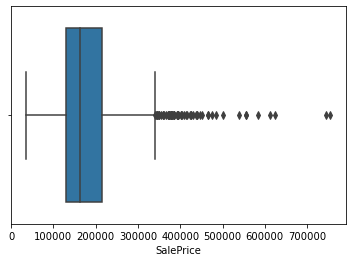

In [33]:
#f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(numeric_data['SalePrice'])

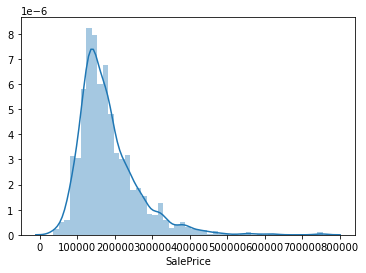

In [32]:
#f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.distplot(numeric_data['SalePrice'])

In [14]:
numeric_data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

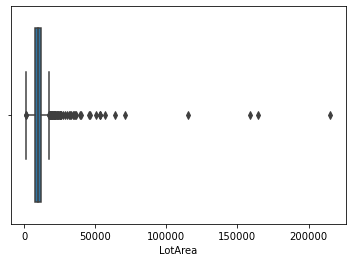

In [34]:
sb.boxplot(numeric_data['LotArea'])

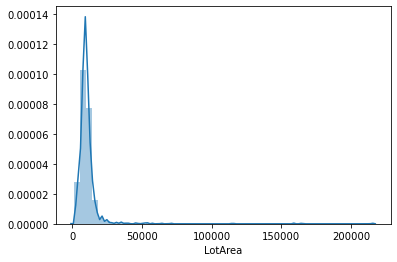

In [35]:
sb.distplot(numeric_data['LotArea'])

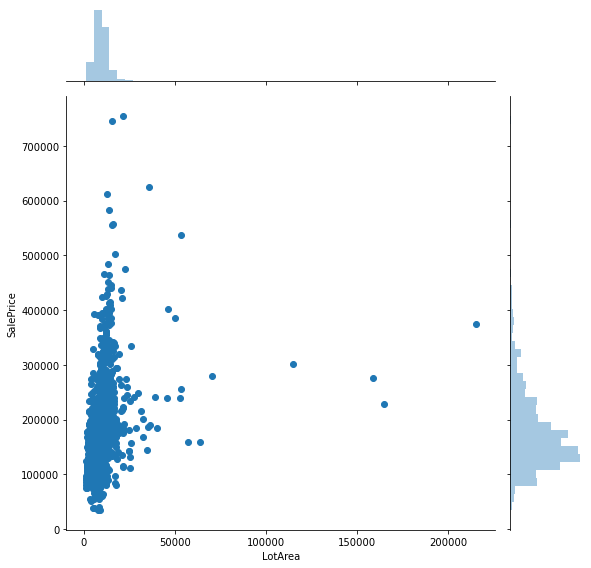

In [36]:
sb.jointplot(x = numeric_data['LotArea'], y = numeric_data['SalePrice'], height = 8)

In [40]:
jointDF = pd.concat([numeric_data['LotArea'], numeric_data['SalePrice']], axis = 1)
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000
